# Project 3: Reddit API & Classification

<table> <tr ><td bgcolor = "white"><img src="../images/cmblogo.png" style="float: centre; margin: 20px; width, height: 50px"><td bgcolor = "white"></td>  
    <td bgcolor = "white"><img src="../images/bumblelogo.png" style="float: centre; margin: 20px; width: 50px, height: 50px"></td>

# Problem Statement


With over <a href='https://sg.oberlo.com/blog/reddit-statistics'>430 million monthly active users worldwide</a>, Reddit houses one of the largest social networking communities and is home to a massive 2.2 million subreddits, of which about 130,000 are currently active. 

In this project, we narrow down our search to subreddits of 2 popular dating apps - Coffee Meets Bagel (<a href='https://www.reddit.com/r/coffeemeetsbagel'>/r/coffeemeetsbagel</a>) and Bumble(<a href='https://www.reddit.com/r/bumble'>/r/bumble</a>). Using Natural Language Processing, we select and train 3 classification models to determine which is the most effective in accurately classifying the subreddit a post is from based on the text it contains. 


## Executive Summary 

Reddit has exploded in popularity since its inception in 2005 and has remained one of the most popular social media communities,  with 58% of its users between the  <a href='https://websitebuilder.org/blog/reddit-statistics/'>ages of 18-29</a> . This is well-explained by the fact that the advent of social media coincided with internet usage gaining widespread adoption among millenials (roughly born between 1982 - 1996). Furthermore, the mobile applications (apps) revolution accompanied the rapid increase in mobile phone ownership due to their accessibility, convenience and general quality-of-life improvements. 

The online dating scene eventually rose to prominence and naturally, subreddits for all the dating apps were created where redditors gathered to seek advice and share their experiences. 2 of the most widely-used and text-heavy apps (Tinder was skipped as it was full of images) - Coffee Meets Bagel and Bumble - were picked to explore in of this classification analysis.

We began by scraping the 2 subreddits for at least 750 posts to account for the elimination of non-useable posts (images only, no text, etc.). Tinder was an initial pick but after scraping 

Scraping Results: 
- Tinder 129/750
- Cmb 691/750
- Bumble 430/750   || 501/987


Consultant for dating app 


## Contents 

### Import Libraries 

In [1]:
# import statements 
import pandas as pd
import requests
import time
import random
import string
import nltk
import regex as re
import numpy as np
import matplotlib.pyplot as plt
# from pprint import pprint


%matplotlib inline

In [2]:
pd.pandas.set_option('display.max_columns', None)

## 1. Extract Datasets From Reddit 

In [ ]:
url = 'https://www.reddit.com/r/tinder.json'

In [ ]:
def secret_agent_generator(N):
    return ''.join(random.choice(string.ascii_letters + string.digits) for _ in range(N))

### Tinder Subreddit 

In [ ]:
posts = []
after = None

for a in range(30):
    if after == None:
        current_url = url
    else:
        current_url = url + '?after=' + after
    print(current_url)
    res = requests.get(current_url, headers={'User-agent': secret_agent_generator(10)})
    
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    posts.extend(current_posts)
    after = current_dict['data']['after']
    
    # generate a random sleep duration to look more 'natural'
    sleep_duration = random.randint(2,60)
    print(sleep_duration)
    time.sleep(sleep_duration)

In [ ]:
pd.DataFrame(posts)

In [ ]:
df_tinder = pd.DataFrame(posts)
df_tinder

In [ ]:
df_tinder.to_csv('tinder_raw.csv', index=False)

In [ ]:
columns_to_keep = ['title', 'selftext', 'subreddit',]

In [ ]:
# drop duplicate rows
df_tinder = df_tinder[columns_to_keep].drop_duplicates(subset=['selftext'])

In [ ]:
df_tinder[df_tinder["selftext"] == ""].shape

In [ ]:
df_tinder.drop(df_tinder[df_tinder["selftext"] == ""].index, inplace=True)

In [ ]:
# Create new column with title and selftext 
df_tinder['title_selftext'] = df_tinder['title'] + ' ' + df_tinder['selftext']

In [ ]:
df_tinder.reset_index
df_tinder

In [ ]:
df_tinder = df_tinder.drop(columns=['title', 'selftext'])
df_tinder.head()

In [ ]:
df_tinder.to_csv('tinder_cleaned.csv', index=False)

### CoffeeMeetsBagel Subreddit

In [ ]:
url_2 = 'https://www.reddit.com/r/coffeemeetsbagel.json'

In [ ]:
cmb_posts = []
after = None

for a in range(30):
    if after == None:
        current_url = url_2
    else:
        current_url = url_2 + '?after=' + after
    print(current_url)
    res = requests.get(current_url, headers={'User-agent': secret_agent_generator(10)})
    
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    cmb_posts.extend(current_posts)
    after = current_dict['data']['after']
    
    # generate a random sleep duration to look more 'natural'
    sleep_duration = random.randint(2,60)
    print(sleep_duration)
    time.sleep(sleep_duration)

In [ ]:
df_cmb = pd.DataFrame(cmb_posts)
df_cmb.head()

In [ ]:
df_cmb.shape

In [ ]:
df_cmb.to_csv("cmb_raw", index=False)

In [ ]:
df_cmb = df_cmb[columns_to_keep]
df_cmb.head()

In [ ]:
df_cmb[df_cmb['selftext'] == '']

In [ ]:
df_cmb = df_cmb.drop_duplicates(subset='selftext')
df_cmb.head()

In [ ]:
df_cmb.drop(df_cmb[df_cmb["selftext"] == ""].index, inplace=True)

In [ ]:
df_cmb['title_selftext'] = df_cmb['title'] + ' ' + df_cmb['selftext']
df_cmb.head()

In [ ]:
df_cmb = df_cmb.drop(columns=['title', 'selftext'])
df_cmb.head()

In [ ]:
df_cmb.to_csv("cmb_cleaned", index=False)

### Bumble 

In [ ]:
url_3 = 'https://www.reddit.com/r/bumble.json'

In [ ]:
bumble_posts = []
after = None

for a in range(40):
    if after == None:
        current_url = url_3
    else:
        current_url = url_3 + '?after=' + after
    print(current_url)
    res = requests.get(current_url, headers={'User-agent': secret_agent_generator(10)})
    
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    bumble_posts.extend(current_posts)
    after = current_dict['data']['after']
    
    # generate a random sleep duration to look more 'natural'
    sleep_duration = random.randint(2,60)
    print(sleep_duration)
    time.sleep(sleep_duration)

In [ ]:
df_bumble = pd.DataFrame(bumble_posts)
df_bumble.head()

In [ ]:
df_bumble.shape

In [ ]:
df_bumble.to_csv("bumble_raw", index=False)

In [ ]:
df_bumble = df_bumble[columns_to_keep]
df_bumble.head()

In [ ]:
df_bumble[df_bumble['selftext'] == '']

In [ ]:
df_bumble = df_bumble.drop_duplicates(subset='selftext')
df_bumble

In [ ]:
df_bumble.drop(df_bumble[df_bumble["selftext"] == ""].index, inplace=True)

In [ ]:
df_bumble['title_selftext'] = df_bumble['title'] + ' ' + df_bumble['selftext']
df_bumble

In [ ]:
df_bumble = df_bumble.drop(columns=['title', 'selftext'])
df_bumble.head()

In [ ]:
df_bumble.to_csv("bumble_cleaned", index=False)

## 2. Data Cleaning 

In this section, we will use our text processing function to remove all non-alphabetic characters, convert them to lower case and lemmatize the remaining words.

In [3]:
df_cmb_raw = pd.read_csv('cmb_raw')
df_bumble_raw = pd.read_csv('bumble_raw')

In [4]:
# df_tinder = pd.read_csv('tinder_cleaned.csv')
df_cmb = pd.read_csv('cmb_cleaned')
df_bumble = pd.read_csv('bumble_cleaned')

In [5]:
from nltk.corpus import stopwords # Import the stopword list
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ted\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ted\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Stopwords
In addition to the imported stopwords, addtional stop words are also included 

In [6]:
stop_words = set(stopwords.words('english'))  
additional_stop_words = ['match', 'chat', 'swipe', 'like', 'app', 'relationship', 'message', 'pic', 'text', 
                         'cmb', 'coffeemeetsbagel', 'bumble', 'coffee', 'meets', 'bagel',
                        'guy', 'girl', 'people', 'title_selftext', 'dtype', 'doe', 'p', 'ca', 'wa', 'cr', 'profile',
                        'one', 'see', 'get', 'day', 'date', 'someone', 'time', 'know', 'account', 'would', 'first', 'back',
                        'ha']
# 
stop_words = stop_words.union(additional_stop_words)

In [7]:
from nltk.stem import WordNetLemmatizer
global stop_words 

def text_processing(raw_text):
    # Function to convert raw text to a string of words
    # 1. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # 2. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 3. Lemmatize 
    lemmatizer = WordNetLemmatizer()
    words_lem = [lemmatizer.lemmatize(i) for i in words]
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stopwords to a set.
    stops = stop_words
    
    # 5. Remove stopwords.
    meaningful_words = [w for w in words_lem if w not in stops]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [8]:
df_cmb_raw[['title', 'selftext']]

,title,selftext
0,99+ likes but only seeing 1-2 suggested/likes ...,"New user to CMB here. Not gonna lie, this app ..."
1,"""Discover"" tab always skews to one type",I've been in Southern California until a recen...
2,I (20F) found someone (25M) from here and he t...,"Hi everyone,\nThis is a rather long thread. I ..."
3,Is this a serious relationship app?,Is CMB an app that people who want to find ser...
4,"Despite preferences, Suggested is full of way ...","Yeah, they’re crazy got, but of course they ar..."
...,...,...
745,I signed up to this app for a week and matched...,NaN
746,This app sucks.,I’ve seen several people in my “discover” tab ...
747,No responses?,"Alright, so I joined like four days ago. I got..."
748,Matched but doesn’t chat?,"The last five matches I’ve had, I sent a perso..."


In [9]:
df_bumble_raw[['title', 'selftext']]

,title,selftext
0,Weekly Profile Critique,\n\nPlease post any profile critique requests...
1,Swiped 6/2019 getting married 3/2021!,NaN
2,When You Get Ghosted - But A Much Better Match...,&amp;#x200B;\n\n[End of message - sometimes go...
3,Need a back brace after this one,NaN
4,She woke up and chose violence,NaN
...,...,...
982,What's with the flakes on Bumble?,"99% of who I match with, if it even happens, u..."
983,I don't think I'm doing this right.,NaN
984,#internationalwomensday impact matters such as...,NaN
985,I received a number of notifications lately sa...,I am a bumble premium member. When I got a not...


In [10]:
df_cmb['title_selftext'] = df_cmb['title_selftext'].map(text_processing)
df_cmb['title_selftext']

0      seeing suggested new user gonna lie kind frust...
1      discover tab always skews type southern califo...
2      f found turn rather hi everyone rather long th...
3      serious want find serious use many luck findin...
4      despite preference suggested full way young ye...
                             ...                        
685    tab work mean aside paying money say person li...
686    suck seen several discover tab love bean bean ...
687    response alright joined four ago got matched n...
688    matched last five sent personal never heard an...
689    joined got question bean regenerate show stuff...
Name: title_selftext, Length: 690, dtype: object

In [11]:
# join title and selftext to a single string
cmb_words = ' '.join(df_cmb['title_selftext'])
cmb_words = " ".join([word for word in cmb_words.split()])
cmb_words

'seeing suggested new user gonna lie kind frustrating bat way push premium eventually show week goal quality gt quantity understand could possibly able count number discover tab always skews type southern california recent move seattle city discover tab always young asian christian woman aligned suggested preference jewish woman ethnicity parameter age uniformity type make wonder even real begin odd woman suggested thus far daily noticeably diverse wondering something others encountered well f found turn rather hi everyone rather long thread may look spilling everything wanna say even decent great sometimes month ago talking met decent found thing talked online kinda insensitive tell inform whenever working ask ab line stomach fucked thing ask tbh assumed everyone work line belly said drama genuinely telling story past claimed liked overreact drama queen also confided personal thing fight mom claimed ex gf anything bad english friend awkward among new unreliable dressed unfashionably m

In [12]:
bumble_words = ' '.join(df_bumble['title_selftext'])
bumble_words = " ".join([word for word in bumble_words.split()])
bumble_words

'Weekly Profile Critique Please post any profile critique requests or advice posts in this thread. When You Get Ghosted - But A Much Better Match Comes Along &amp;#x200B; [End of message - sometimes good things fall apart so better things can come along.](https://preview.redd.it/ui246lu57mm61.jpg?width=300&amp;format=pjpg&amp;auto=webp&amp;s=1ca5c7031b4a9c4e48d1b68656667fcef165bb49) What\'s the biggest red flag you\'ve seen in a profile? Just saw a profile that referenced 1 Timothy 2:9-15. That\'s right, the "I do not allow a woman to teach or have authority over a man" section. How they do that? I matched with a girl on Bumble, 24YO F, 2 days before. We had a great chat on bumble and it was surreal, like too good to be true. We exchanged our instagram profiles and then when I stalked her, I saw her with a guy in many different romantic pictures of them together on IG, So restless me pinged her and I asked," Did you go through a breakup?" She replied,"No I didn\'t, that guy is my boyfr

In [13]:
df_bumble['title_selftext'] = df_bumble['title_selftext'].map(text_processing)
df_bumble['title_selftext']

0      weekly critique please post critique request a...
1      ghosted much better come along amp x b end som...
2      biggest red flag seen saw referenced timothy r...
3      matched yo f great surreal good true exchanged...
4      old approached park dog park today big dog sid...
                             ...                        
496                 love language everyone life language
497    got train everyone opinion stock price prediction
498    question dating apps decide ghost instead unma...
499    without planning meet started texting jan rd a...
500    anyone used new night feature yet fun worthwhi...
Name: title_selftext, Length: 501, dtype: object

In [14]:
print(str(df_cmb['title_selftext']))

0      seeing suggested new user gonna lie kind frust...
1      discover tab always skews type southern califo...
2      f found turn rather hi everyone rather long th...
3      serious want find serious use many luck findin...
4      despite preference suggested full way young ye...
                             ...                        
685    tab work mean aside paying money say person li...
686    suck seen several discover tab love bean bean ...
687    response alright joined four ago got matched n...
688    matched last five sent personal never heard an...
689    joined got question bean regenerate show stuff...
Name: title_selftext, Length: 690, dtype: object


In [15]:
df_combined = pd.concat([df_cmb, df_bumble])
df_combined

,subreddit,title_selftext
0,coffeemeetsbagel,seeing suggested new user gonna lie kind frust...
1,coffeemeetsbagel,discover tab always skews type southern califo...
2,coffeemeetsbagel,f found turn rather hi everyone rather long th...
3,coffeemeetsbagel,serious want find serious use many luck findin...
4,coffeemeetsbagel,despite preference suggested full way young ye...
...,...,...
496,Bumble,love language everyone life language
497,Bumble,got train everyone opinion stock price prediction
498,Bumble,question dating apps decide ghost instead unma...
499,Bumble,without planning meet started texting jan rd a...


In [16]:
df_combined.shape

(1191, 2)

In [17]:
# Assign 1 to CMB, 0 to Bumble
df_combined['subreddit'] = df_combined['subreddit'].map(lambda x: 1 if x == 'coffeemeetsbagel' else 0)
df_combined

,subreddit,title_selftext
0,1,seeing suggested new user gonna lie kind frust...
1,1,discover tab always skews type southern califo...
2,1,f found turn rather hi everyone rather long th...
3,1,serious want find serious use many luck findin...
4,1,despite preference suggested full way young ye...
...,...,...
496,0,love language everyone life language
497,0,got train everyone opinion stock price prediction
498,0,question dating apps decide ghost instead unma...
499,0,without planning meet started texting jan rd a...


## 3. EDA 

This exploratory data analysis section will identify the most common words in each of the subreddits. 

#### Word Clouds 

In [18]:
!pip install wordcloud
from wordcloud import WordCloud
from PIL import Image

#### Coffee Meets Bagel Word Cloud 

In [19]:
df_cmb['title_selftext']

0      seeing suggested new user gonna lie kind frust...
1      discover tab always skews type southern califo...
2      f found turn rather hi everyone rather long th...
3      serious want find serious use many luck findin...
4      despite preference suggested full way young ye...
                             ...                        
685    tab work mean aside paying money say person li...
686    suck seen several discover tab love bean bean ...
687    response alright joined four ago got matched n...
688    matched last five sent personal never heard an...
689    joined got question bean regenerate show stuff...
Name: title_selftext, Length: 690, dtype: object

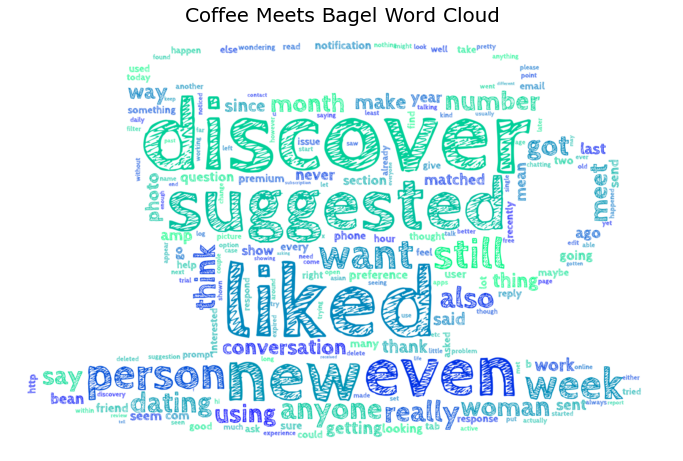

In [20]:
plt.figure(figsize=(12,12))
wc_cmb = WordCloud(background_color="white", max_words=200,font_path='/Users/Ted/appdata/local/microsoft/windows/Fonts/CabinSketch-Bold.ttf',
               stopwords=stop_words, max_font_size=100,
               random_state=69420, width=500, height=500, scale=3, colormap='winter',
               mask = np.array(Image.open('../images/coffee2.jpg')),
               collocations=False).generate(cmb_words)
                   
# wc_cmb.generate(cmb_words)
plt.imshow(wc_cmb, interpolation="bilinear")
plt.axis('off')
plt.title("Coffee Meets Bagel Word Cloud", font="Verdana", size=20, color='black')
plt.show()

#### Bumble Word Cloud

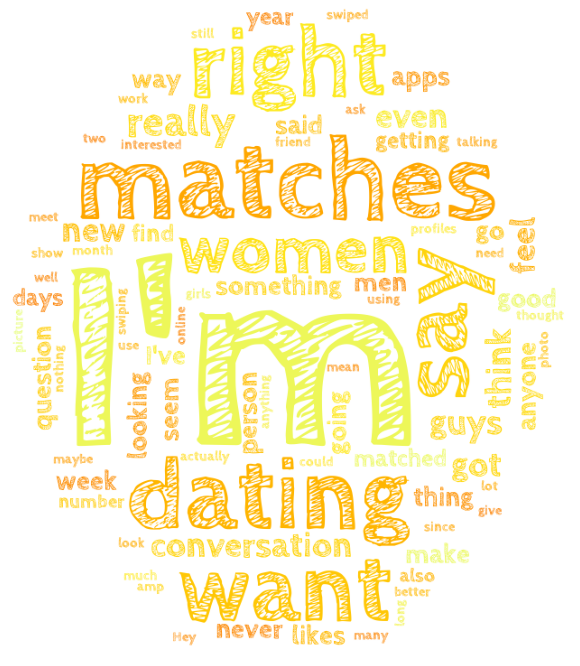

In [21]:
plt.figure(figsize=(12,12))
wc_bumble = WordCloud(background_color="white", max_words=200, font_path='/Users/Ted/appdata/local/microsoft/windows/Fonts/CabinSketch-Bold.ttf',
                    stopwords=stop_words, max_font_size=100,
                    random_state=42069, scale=3, colormap='Wistia',
                    mask = np.array(Image.open('../images/beehive.jfif')),
                    collocations=False,)
wc_bumble.generate(bumble_words)
plt.imshow(wc_bumble)
# plt.title("Bumble Word Cloud", font="Verdana", size=20, color='black')
plt.axis('off')
plt.show()

## 4. Classification Modelling 


### 4.1. Preprocessing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [ ]:
X = df_combined['title_selftext']
y = df_combined['subreddit']

In [ ]:
y.value_counts(normalize=True)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=42, stratify=y)

### 4.2 Baseline Accuracy

In [ ]:
y_test.value_counts(normalize=True)

#### Base Model Testing

In [ ]:
vectorizer = [CountVectorizer(), TfidfVectorizer()]
models = [LogisticRegression(), KNeighborsClassifier(), MultinomialNB(), 
          RandomForestClassifier(), ExtraTreesClassifier(), SVC()]
model_names = ["Logistic Regression", "K Nearest Neighbors", "Multinomial Naive Bayes", "Random Forest", "Extra Trees", "Support Vector Machine"]
train_scores = []
test_scores = []

for vect in vectorizer: 
    for model, name in zip(models, model_names): 
        X_train_transformed = vect.fit_transform(X_train)
        X_test_transformed = vect.transform(X_tamest)
        model.fit(X_train_transformed, y_train)
        train_scores.append(cross_val_score(model, X_train_transformed, y_train, cv=5).mean())
        test_scores.append(model.score(X_test_transformed, y_test))

In [ ]:
cv_train_scores = train_scores[:int(len(train_scores)/2)]
cv_test_scores = test_scores[:int(len(train_scores)/2)]

tf_train_scores = train_scores[int(len(train_scores)/2):]
tf_test_scores = test_scores[int(len(train_scores)/2):]

In [ ]:
pd.DataFrame(data=np.array([cv_train_scores, cv_test_scores, tf_train_scores, tf_test_scores]).T, index=model_names ,columns=['cv_train', 'cv_test', 'tf_train', 'tf_test'])

Based on the results above, it appears that CrossVectorisation is the better performer in terms of accuracy. The models selected for further analysis are: 

- Logistic Regression (LR)
- Multinomial Naive Bayes (MNB)
- Support Vector Machine (SVM)

The top 2 models (LR and MNB) were picked as they both have one of the higher test scores by a few decimal points, although the latter is slightly overfit with its test score higher than its training score. 

For the 3rd model, although Random Forest (RF) does have a higher test score than SVM, RF is also slightly overfit and thus we elect to use SVM.

### 4.3 Hyperparameter Tuning with GridSearchCV

In [ ]:
selected_models = [LogisticRegression(), MultinomialNB(), SVC()]

for model in selected_models:
    pipe = Pipeline([
        ('cvec', CountVectorizer(stop_words=stop_words)),
        ('')
    ])

In [ ]:
cvec = CountVectorizer(stop_words=stop_words)

In [ ]:
X_train_transformed = cvec.fit_transform(X_train)
X_test_transformed = cvec.transform(X_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_transformed, y_train)

print(f"No. of features: {len(cvec.get_feature_names())}")
print(f'Training Score: {lr.score(X_train_transformed, y_train)}')
print(f'Testing Score: {lr.score(X_test_transformed, y_test)}')

In [ ]:
coef_names = cvec.get_feature_names()
coef_df = pd.DataFrame({
    'coefs': coef_names, 
    'vals': np.round(abs(lr.coef_[0]), 5)
})

coef_df.sort_values(by='vals', ascending=False)

### Hyperparameter Tuning with Logistic Regression Model  

Tuning with both L1 and L2 penalties

In [ ]:
lr_model = Pipeline([
    ('cvec', CountVectorizer(stop_words=stop_words)),
    ('lr', LogisticRegression()),
])

##### L2 Penalty

In [ ]:
logr_pipe_params = {
    'cvec__max_features': [2000, 3000],
    'cvec__min_df': [2, 3], 
    'cvec__max_df': [0.9, 0.95], 
    'cvec__ngram_range': [(1,1), (1,2)], 
    'lr__C' : [1, .05],
    'lr__penalty' : ['l2'],
    'lr__solver': ['lbfgs']
}



In [ ]:
lr_gs = GridSearchCV(lr_model, 
                    param_grid=logr_pipe_params,
                    verbose=1)
lr_gs.fit(X_train, y_train)
print(f"Best parameters for L2 Logistic Regression Model: {lr_gs.best_params_}")
print(f"Mean cross-validated score for the best L2 Logistic Regression Model parameters: {lr_gs.best_score_}")
print(f"Mean test accuracy for L2 Logistic Regression Model: {lr_gs.score(X_test, y_test)}")

In [ ]:
model_results = {'Model': 'LR_1', 'train_score': lr_gs.best_score_, 'test_score': lr_gs.score(X_test, y_test)}
model_results

##### L1 Penalty

In [ ]:
logr_pipe_params_2 = {
    'cvec__max_features': [4000, 5000],
    'cvec__min_df': [2, 3], 
    'cvec__max_df': [0.9, 0.95], 
    'cvec__ngram_range': [(1,1), (1,2)], 
    'lr__C' : [1, .05],
    'lr__penalty' : ['l1'],
    'lr__solver': ['saga']
}

In [ ]:
lr2_gs = GridSearchCV(lr_model, 
                    param_grid=logr_pipe_params_2,
                    verbose=1)
lr2_gs.fit(X_train, y_train)
print(f"Best parameters for L1 Logistic Regression Model: {lr2_gs.best_params_}")
print(f"Mean cross-validated score for the best L1 Logistic Regression Model parameters: {lr2_gs.best_score_}")
print(f"Mean test accuracy for L1 Logistic Regression Model: {lr2_gs.score(X_test, y_test)}")

### 4.3 K-Nearest Neighbors Model 

##### Baseline

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_transformed, y_train)

print(f'Training Score: {knn.score(X_train_transformed, y_train)}')
print(f'Testing Score: {knn.score(X_test_transformed, y_test)}')

In [ ]:
cv_accuracies = cross_val_score(knn, X_train_transformed, y_train, cv=5).mean()
cv_accuracies

### Hyperparameter Tuning with K-Nearest Neighbors Model  

In [ ]:
knn_pipe_params = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [2, 3], 
    'cvec__max_df': [0.9, 0.95], 
    'cvec__ngram_range': [(1,1), (1,2)], 
    'knn__n_neighbors':range(1, 51, 10),                 # [2,3]
    'knn__metric': ['euclidean', 'manhattan'],
    'knn__weights':['uniform','distance'],
    'knn__p':[1,2]
}

In [ ]:
pd.DataFrame(knn_gs.cv_results_).sort_values('rank_test_score')

### 4.4 Naive Bayes Model 

##### Baseline

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_transformed, y_train)
print(f'Training Score: {nb.score(X_train_transformed, y_train)}')
print(f'Testing Score: {nb.score(X_test_transformed, y_test)}')

In [ ]:
cv_accuracies = cross_val_score(nb, X_train_transformed, y_train, cv=5).mean()
cv_accuracies

In [ ]:
nb_model = Pipeline([
    ('cvec', CountVectorizer(stop_words=stop_words)),
    ('nb', MultinomialNB())
])

In [ ]:
nb_params = {
    'cvec__max_features': [2000, 3000],
    'cvec__min_df': [2, 3], 
    'cvec__max_df': [0.9, 0.95], 
    'cvec__ngram_range': [(1,1), (1,2)], 
    
}

In [ ]:
nb_gs = GridSearchCV(nb_model,
                    param_grid=nb_params,
                    verbose=1)

nb_gs.fit(X_train, y_train)

print(f"Best parameters for Naive Bayes: {nb_gs.best_params_}")
print(f"Mean cross-validated score for best kNN parameters: {nb_gs.best_score_}")
print(f"Mean test accuracy for kNN: {nb_gs.score(X_test, y_test)}")

The naive bayes model has a slightly better performing training test score of 0.752 and while its test score only differs slightly, indicating that it is not as overfit. 

In [ ]:
neg = nb.feature_log_prob_[0, :].argsort()
pos = nb.feature_log_prob_[1, :].argsort()

In [ ]:
print(np.take(cvec.get_feature_names(), neg[-10:]))
print(np.take(cvec.get_feature_names(), pos[-10:]))

### 4.5 Random Forest and Extra Trees

In [ ]:


rf = RandomForestClassifier(n_estimators=100)
cross_val_score(rf, X_train_transformed, y_train, cv=5).mean()

In [ ]:
rf_model = Pipeline([
    ('cvec', CountVectorizer(stop_words=stop_words)),
    ('rf', RandomForestClassifier())
])

rf_params = {'cvec__max_features': [2000, 3000, 4000, 5000],
             'cvec__min_df': [2, 3], 
             'cvec__max_df': [0.9, 0.95], 
             'cvec__ngram_range': [(1,1), (1,2)], 
             'rf__n_estimators': [100, 150, 200],
             'rf__max_depth': [None, 1, 2, 3, 4, 5],
        }

In [ ]:
rf_gs = GridSearchCV(rf_model,
                     param_grid=rf_params,
                     verbose=1,                      
)

rf_gs.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {rf_gs.best_params_}")
print(f"Mean cross-validated score for best Random Forest parameters: {rf_gs.best_score_}")
print(f"Mean test accuracy for Random Forest: {rf_gs.score(X_test, y_test)}")


#### Extra Trees

In [ ]:
etc = ExtraTreesClassifier(n_estimators=100)
cross_val_score(etc, X_train_transformed, y_train, cv=5).mean()

In [ ]:
etc_model = Pipeline([
    ('cvec', CountVectorizer(stop_words=stop_words)),
    ('etc', ExtraTreesClassifier())
])

etc_params = {'cvec__max_features': [2000, 3000, 4000, 5000],
             'cvec__min_df': [2, 3], 
             'cvec__max_df': [0.9, 0.95], 
             'cvec__ngram_range': [(1,1), (1,2)], 
             'etc__n_estimators': [100, 150, 200],
             'etc__max_depth': [None, 1, 2, 3, 4,],
        }

In [ ]:
etc_gs = GridSearchCV(etc_model,
                     param_grid=etc_params,
                     verbose=1,                      
)

etc_gs.fit(X_train, y_train)

print(f"Best parameters for Extra Trees: {etc_gs.best_params_}")
print(f"Mean cross-validated score for best Extra Trees parameters: {etc_gs.best_score_}")
print(f"Mean test accuracy for Extra Trees: {etc_gs.score(X_test, y_test)}")


In [ ]:
models = ['log_reg (l2)', 'log_reg (l1)', 'kNN', 'MNB', 'RF', 'ET']

In [ ]:
train_scores = [log]

## X. Evaluations & Recommendations